In [1]:
using Plots
using LaTeXStrings

In [2]:
y(x, x_1, y_1, x_2, y_2) = x .* (y_2 - y_1) ./ (x_2 - x_1) .- x_1 .* (y_2 - y_1) ./ (x_2 - x_1) .+ y_1;

# **Section 2.2: The Idea of Elimination**

> **Description:** Introducing the concept of elimination and how to perform it. \
> **Author:** Jacob S. Zelko \
> **Date:** July 10th, 2020 

---

## What is Elimination?

Elimination is a systematic process by which to solve linear equations to minimize the presence of variables in a given system of linear equations. This is best illustrated by a simple example.


### Simple Elimination with a System of Two Linear Equations

Given the two equations:

(1) $ \ x - 2y = 1$

(2) $ \ 3x + 2y = 11$

Multiply (1) by 3 to give the form:

(3) $ \ 3x - 6y = 3 \\ \ 3x + 2y = 11$

Where now subtract equation (2) from (1) being multiplied by 3 which yields the form:

(4) $ x - 2y = 1 \\ \ 0x + 8y = 8$

Using (4), one can solve for the variables $x$ and $y$ via a straightforward approach. One can see that using $8y = 8$ gives $y = 1$ and substituting that into the equation $x - 2y = 1$ gives $x = 3$. Thus, the solution to this system of equations is $(x, y) = (3, 1)$.

Elimination produces an **upper triangular system** shown in (4). It has this name because the non-zero coefficients remaining in (4) form a triangle. When solving for the values of the variables, a process used **back substitution** was used. It is termed this because when one has an upper triangular system, one starts at the "peak" of the triangle and goes backwards up the triangle until all variables values are found.

The solution that was determined using elimination is in fact the same solution for the system before elimination. One can verify this graphically:

In [3]:
input = -5:5;
output = y(input, 1, 0, 3, 1);

In [4]:
plot(input,
     output, 
     framestyle=:zerolines,
     label="Equation (1)",
     title="Before Elimination",
     xlim=(-5, 5),
     ylim=(-5, 5),
     linewidth = 3
     );

In [5]:
input = -5:5;
output = y(input, 0, 5.5, 3, 1);

In [6]:
plot!(input,
     output, 
     label="Equation (2)",
     linewidth = 3
     );

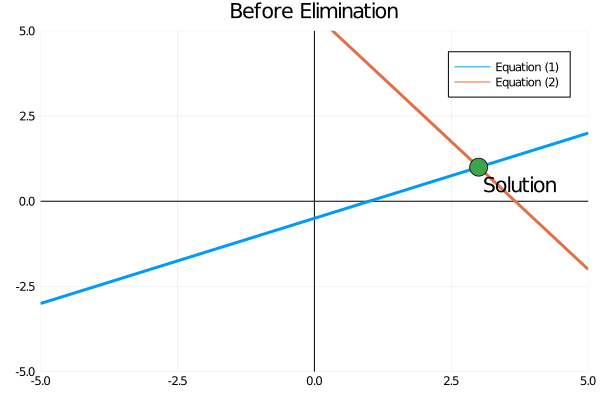

In [7]:
scatter!(
    (3, 1),
    annotations = (3.1, 0.8, Plots.text("Solution", :top, :left)),
    marker = 10,
    label = false,
)

In [8]:
input = -5:5;
output = y(input, 1, 0, 3, 1);

In [9]:
plot(input,
     output, 
     framestyle=:zerolines,
     label="Equation (1)",
     title="After Elimination",
     xlim=(-5, 5),
     ylim=(-5, 5),
     linewidth = 3
     );

In [10]:
input = -5:5;
output = [1 for i in input];

In [11]:
plot!(input,
     output,
     label=L"8y = 8",
     linewidth = 3
     );

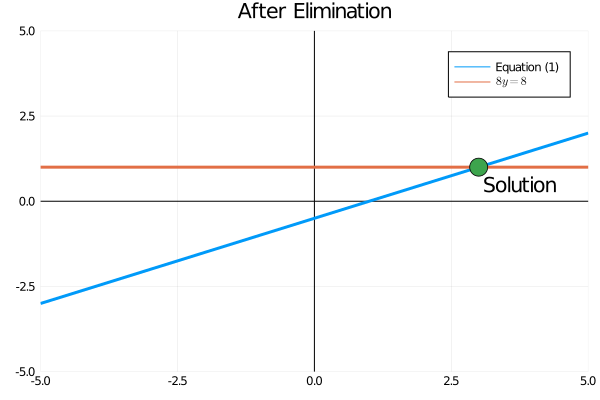

In [12]:
scatter!(
    (3, 1),
    annotations = (3.1, 0.8, Plots.text("Solution", :top, :left)),
    marker = 10,
    label = false,
)

## Where Elimination Fails

### No Solution

A solution must lie on all lines for a given system of equations. If this does not happen and that a meeting point for all lines does not exist, there is **no solution**. An example of this is given with the equations:

(5) $ \ x - 2y = 1$

(6) $ \ 3x - 6y = 11$

and plotting these equations makes it obvious to see that they do not intersect:

In [13]:
input = -5:5;
output = y(input, 0, -0.5, -1, -1);

In [14]:
plot(input,
     output, 
     framestyle=:zerolines,
     label=L"x - 2y = 1",
     title="No Solution",
     xlim=(-5, 5),
     ylim=(-5, 5),
     linewidth = 3
     );

In [15]:
input = -5:5;
output = y(input, 5/3, -1, 0, -11/6);

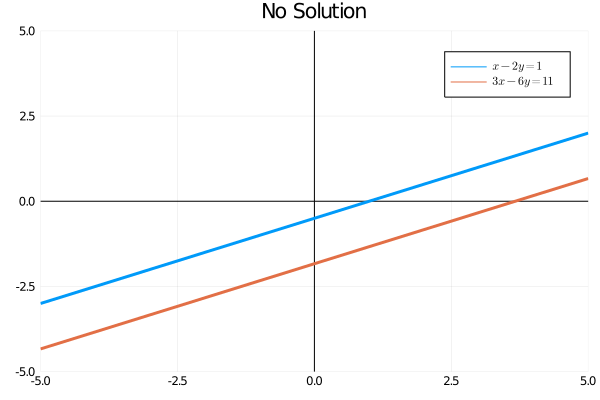

In [16]:
plot!(input,
     output,
     label=L"3x - 6y = 11",
     linewidth = 3
     )

Furthermore, one does not need to graphically prove this. If one were to use elimination on equations (5) and (6), one would get the form:

(7) $x - 2y = 1 \\
0y = 8$

after subtracting 3 times the top row from the bottom row. If one were to attempt to solve the variables, one would quickly see that there would be division by zero. This is not possible to do! A **pivot** is never allowed to be zero.

#### What Is a Pivot?

**Pivots** are the first nonzero entry in a row of a matrix that creates zeros via row operations (i.e. the pivot does the elimination in rows). [1] As such, a zero is never allowed as a pivot as this results in division by zero. Thus producing an unsolvable system.

For a system involving $n$ equations, what is equally desired is $n$ pivots to produce a unique solution. The value to produce these unique solutions via row operations is called the **multiplier**. To determine the **multiplier**, divide the value of the entry to be eliminated in a given row by the pivot in another row. To put it into more concise language:

(8) $ \ l_{i,j} = \frac{entry \ to \ eliminate \ in \ row \ i}{pivot \ in \ row \ j}$ 

After elimination via the multiplier, pivots are found on the diagonal of the resulting matrix that underwent elimination.

### Infinitely Many Solutions

A system with infinitely many solutions have infinitely many points that fall on the line created by the system. To represent this, if one were given equation (5) but the new equation:

(9) $ \ 3x - 6y = 3$

and performed the same operation of subtracting 3 times equation (5) from equation (9), one would be left with the form:

(10) $x - 2y = 1 \\
0y = 0$

Every point chosen for equation (5) is also a solution for that system. This can be shown graphically:

In [21]:
input = -5:5;
output = y(input, 0, -0.5, -1, -1);

In [22]:
plot(input,
     output, 
     framestyle=:zerolines,
     label=L"x - 2y = 1",
     title="Infinite Solutions",
     xlim=(-5, 5),
     ylim=(-5, 5),
     linewidth = 5
     );

In [23]:
input = -5:5;
output = y(input, 0, -0.5, -1, -1);

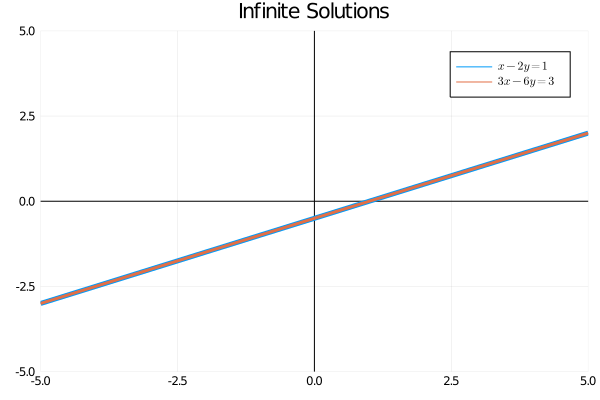

In [24]:
plot!(input,
     output,
     label=L"3x - 6y = 3",
     linewidth = 3
     )

## References:

[1] D. C. Lay, “Linear Algebra and its applications 5th edition,” 2016.